<a href="https://colab.research.google.com/github/TristanKoh/p4ds-project/blob/khizer/checkpoint_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Independent Variables**

In [ ]:
df_eme= pd.read_csv("lawatlas-emergency-declarations.csv")
df_govt = pd.read_csv("oxford-government-response.csv")

In [ ]:
df_govt.fillna(0)
df_govt.head(100)


,date,location_key,school_closing,workplace_closing,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index
0,2020-01-01,AD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,2020-01-02,AD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,2020-01-03,AD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,2020-01-04,AD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,2020-01-05,AD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2020-04-05,AD,3.0,3.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,2.0,0.0,48.15
96,2020-04-06,AD,3.0,3.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,2.0,0.0,48.15
97,2020-04-07,AD,3.0,3.0,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,2.0,0.0,48.15
98,2020-04-08,AD,3.0,3.0,1.0,1.0,0.0,3.0,2.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,2.0,0.0,56.48


In [ ]:
df_govt.dropna(inplace=True)

In [ ]:
df_govt.dropna(inplace=True)

In [ ]:
df_govt.columns

Index(['date', 'location_key', 'school_closing', 'workplace_closing',
       'cancel_public_events', 'restrictions_on_gatherings',
       'public_transport_closing', 'stay_at_home_requirements',
       'restrictions_on_internal_movement', 'international_travel_controls',
       'income_support', 'debt_relief', 'fiscal_measures',
       'international_support', 'public_information_campaigns',
       'testing_policy', 'contact_tracing',
       'emergency_investment_in_healthcare', 'investment_in_vaccines',
       'facial_coverings', 'vaccination_policy', 'stringency_index'],
      dtype='object')

In [ ]:
#pearsons #spearmans #anova

**Pearson Method** assume dependent variable as stringency index

In [ ]:
  y_dep = df_govt["stringency_index"]
  x_ind = df_govt.drop(["date","stringency_index"] ,axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test= train_test_split(x_ind,y_dep,test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((101177, 20), (43362, 20))

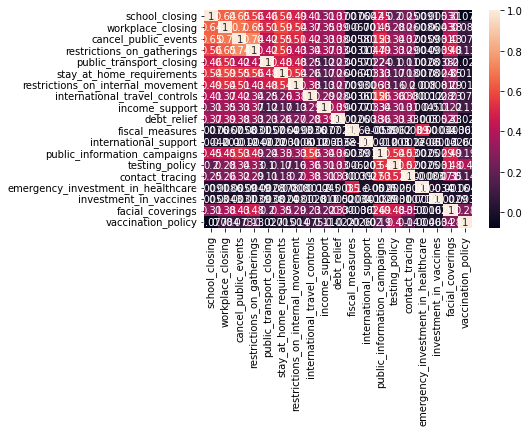

In [ ]:
 import seaborn as sns
 cor = X_train.corr()
 sns.heatmap(cor, annot= True)

Alot of the features can be dropped based on the heatmap. We can remove features based on those that are highly correlated to each other.

In [ ]:
def pearson(df, percentage):
  feature_corr = set()
  corr_matrix = df.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if corr_matrix.iloc[i,j]>percentage:
        column = corr_matrix.columns[i]
        feature_corr.add(column)
  return feature_corr

In [ ]:
features = pearson(X_train,0.7)
features

{'restrictions_on_gatherings'}

In [ ]:
df_govt= df_govt.drop(columns=['cancel_public_events', 'restrictions_on_gatherings'])

We drop cancel_public_events and restrictions_on_gathering

remov restrictions on gathering 

Now for the emergency df


In [ ]:
df_eme

,date,location_key,lawatlas_mitigation_policy,lawatlas_state_emergency,lawatlas_emerg_statewide,lawatlas_travel_requirement,lawatlas_traveler_type_all_people_entering_the_state,lawatlas_traveler_type_travelers_from_specified_states,lawatlas_traveler_type_travelers_from_specified_countries,lawatlas_traveler_type_general_international_travelers,...,lawatlas_action_preempt_imposing_additional_restrictions_on_public_spaces,lawatlas_action_preempt_restricting_scope_of_services_of_an_essential_business,lawatlas_action_preempt_expanding_the_definition_of_non-essential_business,lawatlas_action_preempt_restricting_the_hours_of_operation_of_an_essential_business,lawatlas_action_preempt_imposing_restrictions_that_conflict_with_state_order,lawatlas_action_preempt_restricting_the_performance_of_an_essential_function,lawatlas_action_preempt_restricting_people_from_leaving_home,lawatlas_action_preempt_restricting_the_operations_of_schools,lawatlas_action_preempt_imposing_gathering_bans,lawatlas_local_allow
0,2020-01-20,US_AK,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-21,US_AK,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-22,US_AK,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-23,US_AK,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-24,US_AK,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8359,2020-06-27,US_WY,1,1.0,1.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8360,2020-06-28,US_WY,1,1.0,1.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8361,2020-06-29,US_WY,1,1.0,1.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8362,2020-06-30,US_WY,1,1.0,1.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

df_eme = df_eme.fillna(0)

In [ ]:
df_eme.columns

Index(['date', 'location_key', 'lawatlas_mitigation_policy',
       'lawatlas_state_emergency', 'lawatlas_emerg_statewide',
       'lawatlas_travel_requirement',
       'lawatlas_traveler_type_all_people_entering_the_state',
       'lawatlas_traveler_type_travelers_from_specified_states',
       'lawatlas_traveler_type_travelers_from_specified_countries',
       'lawatlas_traveler_type_general_international_travelers',
       ...
       'lawatlas_action_preempt_imposing_additional_restrictions_on_public_spaces',
       'lawatlas_action_preempt_restricting_scope_of_services_of_an_essential_business',
       'lawatlas_action_preempt_expanding_the_definition_of_non-essential_business',
       'lawatlas_action_preempt_restricting_the_hours_of_operation_of_an_essential_business',
       'lawatlas_action_preempt_imposing_restrictions_that_conflict_with_state_order',
       'lawatlas_action_preempt_restricting_the_performance_of_an_essential_function',
       'lawatlas_action_preempt_restrict

In [ ]:
df_eme.set_index("date", inplace= True)


KeyError: ignored

In [ ]:
df_eme

,location_key,lawatlas_mitigation_policy,lawatlas_state_emergency,lawatlas_emerg_statewide,lawatlas_travel_requirement,lawatlas_traveler_type_all_people_entering_the_state,lawatlas_traveler_type_travelers_from_specified_states,lawatlas_traveler_type_travelers_from_specified_countries,lawatlas_traveler_type_general_international_travelers,lawatlas_traveler_type_all_air_travelers,...,lawatlas_action_preempt_imposing_additional_restrictions_on_public_spaces,lawatlas_action_preempt_restricting_scope_of_services_of_an_essential_business,lawatlas_action_preempt_expanding_the_definition_of_non-essential_business,lawatlas_action_preempt_restricting_the_hours_of_operation_of_an_essential_business,lawatlas_action_preempt_imposing_restrictions_that_conflict_with_state_order,lawatlas_action_preempt_restricting_the_performance_of_an_essential_function,lawatlas_action_preempt_restricting_people_from_leaving_home,lawatlas_action_preempt_restricting_the_operations_of_schools,lawatlas_action_preempt_imposing_gathering_bans,lawatlas_local_allow
date,,,,,,,,,,,,,,,,,,,,,
2020-01-20,US_AK,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-21,US_AK,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-22,US_AK,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-23,US_AK,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,US_AK,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,US_WY,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-06-28,US_WY,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-06-29,US_WY,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


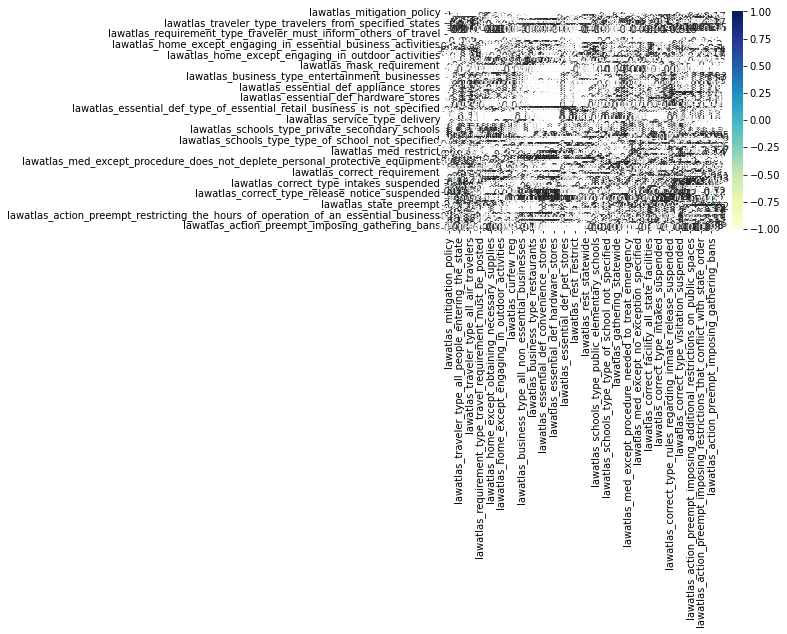

In [ ]:
sns.heatmap(df_eme.corr(), annot=True, cmap="YlGnBu")
plt.show()

Need to figure out independent and dependent variables

reduced row echelon form. writes the entire df as a matrix. if something is independent that column becomes zero and then we extract the non-zero columns

In [ ]:
df_govt_1= df_govt.sample(frac=0.01).drop(columns = ["location_key","date"])
df_govt_1

,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index
236438,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,2.0,0.0,29.63
54005,2.0,0.0,1.0,1.0,0.0,1.0,2.0,4.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,1.0,5.0,50.93
57410,0.0,2.0,2.0,3.0,1.0,0.0,2.0,4.0,1.0,1.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,2.0,0.0,62.96
216831,3.0,2.0,2.0,3.0,2.0,3.0,2.0,4.0,2.0,1.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,91.67
3724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200494,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,4.0,2.0,23.15
70840,3.0,2.0,2.0,4.0,0.0,3.0,1.0,1.0,1.0,2.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,4.0,0.0,71.30
295738,3.0,3.0,2.0,3.0,0.0,2.0,2.0,4.0,0.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,3.0,0.0,82.41
67411,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,3.0,0.0,25.00


In [ ]:
import sympy
reduced_form, inds = sympy.Matrix(df_govt_1.values).rref()

In [ ]:
len(inds)

20

In [ ]:
df_eme_1 = df_eme.drop(columns = ["location_key"])
df_eme_1

,lawatlas_mitigation_policy,lawatlas_state_emergency,lawatlas_emerg_statewide,lawatlas_travel_requirement,lawatlas_traveler_type_all_people_entering_the_state,lawatlas_traveler_type_travelers_from_specified_states,lawatlas_traveler_type_travelers_from_specified_countries,lawatlas_traveler_type_general_international_travelers,lawatlas_traveler_type_all_air_travelers,lawatlas_requirement_type_traveler_must_self_quarantine,...,lawatlas_action_preempt_imposing_additional_restrictions_on_public_spaces,lawatlas_action_preempt_restricting_scope_of_services_of_an_essential_business,lawatlas_action_preempt_expanding_the_definition_of_non-essential_business,lawatlas_action_preempt_restricting_the_hours_of_operation_of_an_essential_business,lawatlas_action_preempt_imposing_restrictions_that_conflict_with_state_order,lawatlas_action_preempt_restricting_the_performance_of_an_essential_function,lawatlas_action_preempt_restricting_people_from_leaving_home,lawatlas_action_preempt_restricting_the_operations_of_schools,lawatlas_action_preempt_imposing_gathering_bans,lawatlas_local_allow
date,,,,,,,,,,,,,,,,,,,,,
2020-01-20,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-21,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-22,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-23,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-06-28,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-06-29,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_eme_1= df_eme.sample(frac=0.2).drop(columns = ["location_key"])
df_eme_1

,lawatlas_mitigation_policy,lawatlas_state_emergency,lawatlas_emerg_statewide,lawatlas_travel_requirement,lawatlas_traveler_type_all_people_entering_the_state,lawatlas_traveler_type_travelers_from_specified_states,lawatlas_traveler_type_travelers_from_specified_countries,lawatlas_traveler_type_general_international_travelers,lawatlas_traveler_type_all_air_travelers,lawatlas_requirement_type_traveler_must_self_quarantine,...,lawatlas_action_preempt_imposing_additional_restrictions_on_public_spaces,lawatlas_action_preempt_restricting_scope_of_services_of_an_essential_business,lawatlas_action_preempt_expanding_the_definition_of_non-essential_business,lawatlas_action_preempt_restricting_the_hours_of_operation_of_an_essential_business,lawatlas_action_preempt_imposing_restrictions_that_conflict_with_state_order,lawatlas_action_preempt_restricting_the_performance_of_an_essential_function,lawatlas_action_preempt_restricting_people_from_leaving_home,lawatlas_action_preempt_restricting_the_operations_of_schools,lawatlas_action_preempt_imposing_gathering_bans,lawatlas_local_allow
date,,,,,,,,,,,,,,,,,,,,,
2020-04-18,1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-16,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-06-07,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2020-04-30,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2020-05-30,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-15,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-11,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-12,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import sympy
reduced_form, inds = sympy.Matrix(df_eme_1.values).rref()

In [ ]:
df_eme_1.iloc[:,np.array(inds)]

,lawatlas_mitigation_policy,lawatlas_state_emergency,lawatlas_emerg_statewide,lawatlas_travel_requirement,lawatlas_traveler_type_all_people_entering_the_state,lawatlas_traveler_type_travelers_from_specified_states,lawatlas_traveler_type_travelers_from_specified_countries,lawatlas_traveler_type_general_international_travelers,lawatlas_traveler_type_all_air_travelers,lawatlas_home_requirement,...,lawatlas_action_preempt_imposing_additional_restrictions_on_public_spaces,lawatlas_action_preempt_restricting_scope_of_services_of_an_essential_business,lawatlas_action_preempt_expanding_the_definition_of_non-essential_business,lawatlas_action_preempt_restricting_the_hours_of_operation_of_an_essential_business,lawatlas_action_preempt_imposing_restrictions_that_conflict_with_state_order,lawatlas_action_preempt_restricting_the_performance_of_an_essential_function,lawatlas_action_preempt_restricting_people_from_leaving_home,lawatlas_action_preempt_restricting_the_operations_of_schools,lawatlas_action_preempt_imposing_gathering_bans,lawatlas_local_allow
date,,,,,,,,,,,,,,,,,,,,,
2020-03-13,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-06,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2020-02-03,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-31,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-20,1,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-01,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-18,1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2020-01-22,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


index of independent columns


In [ ]:
len(inds)

87

Lasso regression on govt_df

In [ ]:
df = df_govt.drop(columns=["location_key", "date"])

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
df

,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,debt_relief,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303637,3.0,2.0,2.0,3.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,3.0,5.0,73.15
303638,3.0,2.0,2.0,3.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,3.0,5.0,73.15
303639,3.0,2.0,2.0,3.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,3.0,5.0,73.15
303640,3.0,2.0,2.0,3.0,0.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,3.0,5.0,73.15


In [ ]:
# filter out the x and y
y_dep = df["stringency_index"]
x_ind = df.drop(["stringency_index"] ,axis=1)

In [ ]:
scaler = StandardScaler()
x_ind = scaler.fit_transform(x_ind)

In [ ]:
#only x needs to be standardized because the minimzation function includes is the sum of all the coefficients

In [ ]:
clf = Lasso(alpha = 0.1)
clf.fit(x_ind, y_dep)

Lasso(alpha=0.1)

In [ ]:
inds = np.nonzero(clf.coef_)[0] # keep them
inds

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 12, 17, 18])

In [ ]:
df.iloc[:,inds]

,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,public_information_campaigns,facial_coverings,vaccination_policy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
303637,3.0,2.0,2.0,3.0,0.0,2.0,2.0,2.0,0.0,2.0,3.0,5.0
303638,3.0,2.0,2.0,3.0,0.0,2.0,2.0,2.0,0.0,2.0,3.0,5.0
303639,3.0,2.0,2.0,3.0,0.0,2.0,2.0,2.0,0.0,2.0,3.0,5.0
303640,3.0,2.0,2.0,3.0,0.0,2.0,2.0,2.0,0.0,2.0,3.0,5.0


In [ ]:
df_govt.shape

(322117, 22)

In [ ]:
df_govt.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=False)

,date,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,public_transport_closing,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,...,fiscal_measures,international_support,public_information_campaigns,testing_policy,contact_tracing,emergency_investment_in_healthcare,investment_in_vaccines,facial_coverings,vaccination_policy,stringency_index
0,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
1,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
4,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321785,2021-08-11,3.0,2.0,2.0,3.0,0.0,2.0,2.0,2.0,0.0,...,0.0,0.0,2.0,2.0,0.0,0.0,0.0,3.0,5.0,73.15
321786,2021-08-12,3.0,2.0,2.0,3.0,0.0,2.0,2.0,2.0,0.0,...,0.0,0.0,2.0,2.0,0.0,0.0,0.0,3.0,5.0,73.15
321787,2021-08-13,3.0,2.0,2.0,3.0,0.0,2.0,2.0,2.0,0.0,...,0.0,0.0,2.0,2.0,0.0,0.0,0.0,3.0,5.0,73.15
321788,2021-08-14,3.0,2.0,2.0,3.0,0.0,2.0,2.0,2.0,0.0,...,0.0,0.0,2.0,2.0,0.0,0.0,0.0,3.0,5.0,73.15


In [ ]:
X_train, X_test,y_train, y_test= train_test_split(x_ind,y_dep,test_size=0.3,random_state=42)